In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/1017 RDS/project')

In [3]:
!ls

 insurance.csv	'project proposal.gdoc'   RDS_prob.ipynb


# Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load data

In [6]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Feature Exploration

## missing values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## distributions

In [12]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


Text(0.5, 0.98, 'Boxplots for Numerical Features')

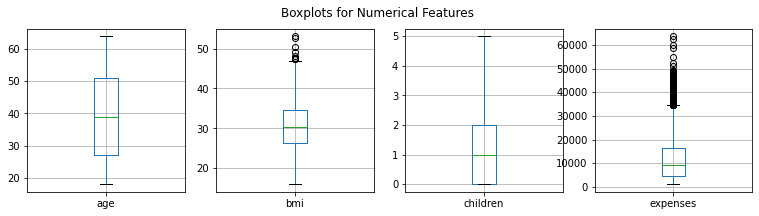

In [30]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df.boxplot(column=['age'], ax=axe[0])
df.boxplot(column=['bmi'], ax=axe[1])
df.boxplot(column=['children'], ax=axe[2])
df.boxplot(column=['expenses'], ax=axe[3])
fig.suptitle('Boxplots for Numerical Features')

Text(0.5, 1.1, 'Distribution for Numerical Features')

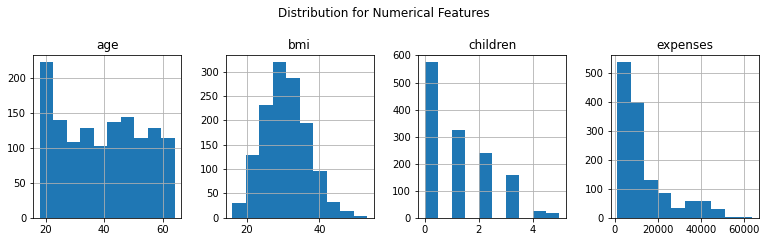

In [49]:
fig,axe = plt.subplots(1,4,figsize=[13,3])
df.hist(column=['age'], ax=axe[0])
df.hist(column=['bmi'], ax=axe[1])
df.hist(column=['children'], ax=axe[2])
df.hist(column=['expenses'], ax=axe[3])
fig.suptitle('Distribution for Numerical Features',y=1.1)
# fig.subplots_adjust(hspace=.5)

Text(0.5, 0.98, 'Distribution of Categorical Features')

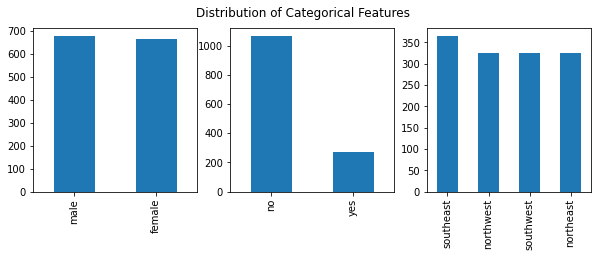

In [38]:
fig,axe = plt.subplots(1,3,figsize=[10,3])
df['sex'].value_counts().plot(kind='bar', ax=axe[0])
df['smoker'].value_counts().plot(kind='bar', ax=axe[1])
df['region'].value_counts().plot(kind='bar', ax=axe[2])
fig.suptitle('Distribution of Categorical Features')

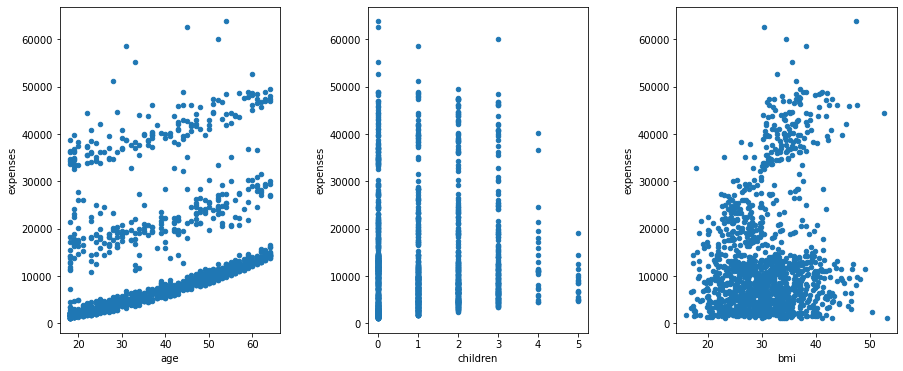

In [51]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

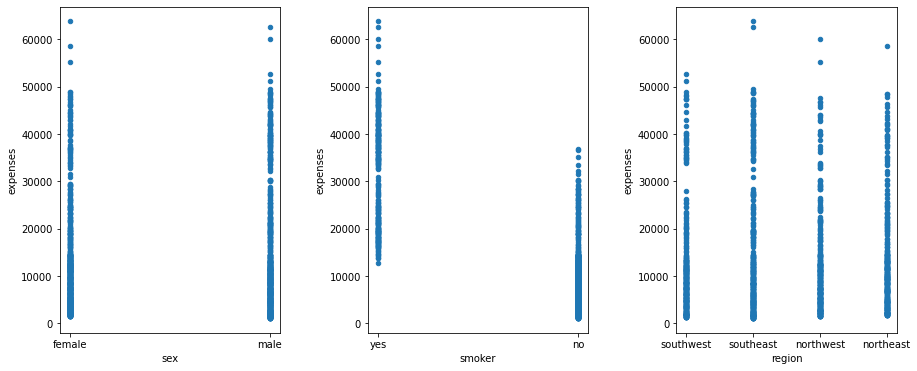

In [52]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='sex', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='smoker', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='region', y='expenses', ax=axes[2])

## correlations

In [40]:
df_corr = df.corr()
df_corr

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


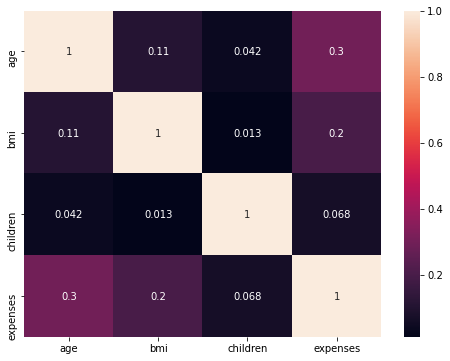

In [42]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot = True)